In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Apple은 'AppleGothic', Windows는 'Malgun Gothic'을 추천
plt.rcParams['font.family'] = "Malgun Gothic"

In [2]:
sparta_data = pd.read_csv('./data/enrolleds_detail.csv')
sparta_data

,lecture_id,done_date,user_id
0,5f266927e67b8fcf4340c087,2020-08-18 23:15:34.423000,4b7059a5ac55da515ec9bd77c7ceaaff
1,5f266927e67b8fcf4340c087,2020-08-04 11:56:07.321000,3614f59da8a89ab0e92e9e5b44b3de9e
2,5f266927e67b8fcf4340c087,2020-08-03 12:19:58.087000,93993d460a3ff841df8f138151736783
3,5f266927e67b8fcf4340c087,2020-08-08 15:15:15.967000,2f3985b0b974db1c6f1ca01b321052e0
4,5f266927e67b8fcf4340c087,2020-08-04 10:30:58.999000,b7d0953832ad73adf2fe1a1ab0e0d612
...,...,...,...
8123,5f36558829f38171335a890a,2020-09-03 22:37:33.499000,210d5271aa07075297a6969df84094c6
8124,5f36558829f38171335a890a,2020-08-29 11:09:58.492000,733fab0fce4b3bce53f09a959790a126
8125,5f36558829f38171335a890a,2020-09-06 12:25:24.874000,ac54f50e56384ec3b3650a3594a352a2
8126,5f36558829f38171335a890a,2020-09-07 22:11:20.110000,943960c67dc493af15d1d01c14019671


In [3]:
format = '%Y-%m-%dT%H:%M:%S.%f'
sparta_data['done_date_time'] = pd.to_datetime(sparta_data['done_date'],format = format)
sparta_data['done_date_time_weekday'] = sparta_data['done_date_time'].dt.day_name()
sparta_data

,lecture_id,done_date,user_id,done_date_time,done_date_time_weekday
0,5f266927e67b8fcf4340c087,2020-08-18 23:15:34.423000,4b7059a5ac55da515ec9bd77c7ceaaff,2020-08-18 23:15:34.423,Tuesday
1,5f266927e67b8fcf4340c087,2020-08-04 11:56:07.321000,3614f59da8a89ab0e92e9e5b44b3de9e,2020-08-04 11:56:07.321,Tuesday
2,5f266927e67b8fcf4340c087,2020-08-03 12:19:58.087000,93993d460a3ff841df8f138151736783,2020-08-03 12:19:58.087,Monday
3,5f266927e67b8fcf4340c087,2020-08-08 15:15:15.967000,2f3985b0b974db1c6f1ca01b321052e0,2020-08-08 15:15:15.967,Saturday
4,5f266927e67b8fcf4340c087,2020-08-04 10:30:58.999000,b7d0953832ad73adf2fe1a1ab0e0d612,2020-08-04 10:30:58.999,Tuesday
...,...,...,...,...,...
8123,5f36558829f38171335a890a,2020-09-03 22:37:33.499000,210d5271aa07075297a6969df84094c6,2020-09-03 22:37:33.499,Thursday
8124,5f36558829f38171335a890a,2020-08-29 11:09:58.492000,733fab0fce4b3bce53f09a959790a126,2020-08-29 11:09:58.492,Saturday
8125,5f36558829f38171335a890a,2020-09-06 12:25:24.874000,ac54f50e56384ec3b3650a3594a352a2,2020-09-06 12:25:24.874,Sunday
8126,5f36558829f38171335a890a,2020-09-07 22:11:20.110000,943960c67dc493af15d1d01c14019671,2020-09-07 22:11:20.110,Monday


In [5]:
weekdata = sparta_data.groupby('done_date_time_weekday')['user_id'].count()
weekdata

done_date_time_weekday
Friday        859
Monday       1354
Saturday      926
Sunday       1541
Thursday      937
Tuesday      1624
Wednesday     887
Name: user_id, dtype: int64

In [12]:
weeks= sparta_data['done_date_time_weekday'].unique().tolist()
weeks = ['Monday','Tuesday','Wednesday','Thursday', 'Friday','Saturday','Sunday']
weekdata = weekdata.agg(weeks) #요일별로 묶어준다 

In [13]:
weekdata

Monday       1354
Tuesday      1624
Wednesday     887
Thursday      937
Friday        859
Saturday      926
Sunday       1541
Name: user_id, dtype: int64

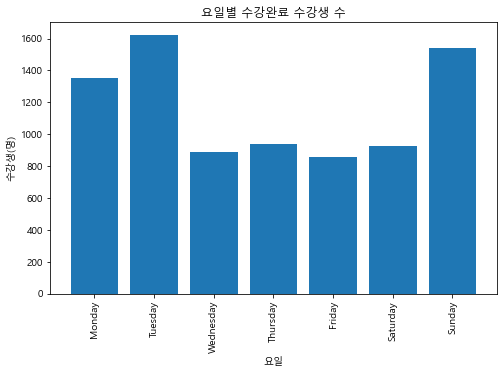

In [14]:
plt.figure(figsize = (8,5))
plt.bar(weekdata.index,weekdata )
plt.title('요일별 수강완료 수강생 수')
plt.xlabel('요일')
plt.ylabel('수강생(명)')
plt.xticks(rotation = 90)
plt.show()

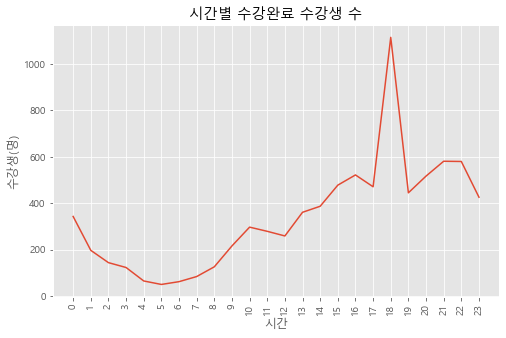

In [21]:
sparta_data['done_date_hour'] =sparta_data['done_date_time'].dt.hour
hourdata=sparta_data.groupby('done_date_hour')['user_id'].count().sort_index()

plt.style.use('ggplot')

plt.figure(figsize = (8,5))
plt.plot(hourdata.index,hourdata )
plt.title('시간별 수강완료 수강생 수')
plt.xlabel('시간')
plt.ylabel('수강생(명)')
plt.xticks(range(24),rotation = 90)
plt.show()

In [23]:
#pivot_table
sparta_data_pivot_table = pd.pivot_table(sparta_data, 
                                        values = 'user_id',
                                        aggfunc='count',
                                        index=['done_date_time_weekday'],
                                        columns = ['done_date_hour']
                                       ).agg(weeks)

sparta_data_pivot_table

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Monday,67,31,30,27,3,5,19,14,28,22,...,62,56,100,84,68,86,119,117,118,86
Tuesday,51,27,17,12,6,3,6,14,20,26,...,41,56,68,34,713,56,66,97,92,86
Wednesday,47,19,12,8,10,15,14,3,22,20,...,34,68,40,68,80,71,56,75,82,52
Thursday,39,30,10,15,14,2,5,11,10,18,...,46,69,80,60,61,61,70,62,94,65
Friday,72,36,20,9,5,1,5,2,10,34,...,44,61,57,70,67,51,45,45,47,33
Saturday,31,17,10,22,7,4,4,19,9,51,...,72,78,66,82,55,26,47,70,52,37
Sunday,36,37,45,30,20,20,9,21,27,45,...,88,90,111,73,71,94,114,115,95,67


In [24]:
sparta_data

,lecture_id,done_date,user_id,done_date_time,done_date_time_weekday,done_date_hour
0,5f266927e67b8fcf4340c087,2020-08-18 23:15:34.423000,4b7059a5ac55da515ec9bd77c7ceaaff,2020-08-18 23:15:34.423,Tuesday,23
1,5f266927e67b8fcf4340c087,2020-08-04 11:56:07.321000,3614f59da8a89ab0e92e9e5b44b3de9e,2020-08-04 11:56:07.321,Tuesday,11
2,5f266927e67b8fcf4340c087,2020-08-03 12:19:58.087000,93993d460a3ff841df8f138151736783,2020-08-03 12:19:58.087,Monday,12
3,5f266927e67b8fcf4340c087,2020-08-08 15:15:15.967000,2f3985b0b974db1c6f1ca01b321052e0,2020-08-08 15:15:15.967,Saturday,15
4,5f266927e67b8fcf4340c087,2020-08-04 10:30:58.999000,b7d0953832ad73adf2fe1a1ab0e0d612,2020-08-04 10:30:58.999,Tuesday,10
...,...,...,...,...,...,...
8123,5f36558829f38171335a890a,2020-09-03 22:37:33.499000,210d5271aa07075297a6969df84094c6,2020-09-03 22:37:33.499,Thursday,22
8124,5f36558829f38171335a890a,2020-08-29 11:09:58.492000,733fab0fce4b3bce53f09a959790a126,2020-08-29 11:09:58.492,Saturday,11
8125,5f36558829f38171335a890a,2020-09-06 12:25:24.874000,ac54f50e56384ec3b3650a3594a352a2,2020-09-06 12:25:24.874,Sunday,12
8126,5f36558829f38171335a890a,2020-09-07 22:11:20.110000,943960c67dc493af15d1d01c14019671,2020-09-07 22:11:20.110,Monday,22


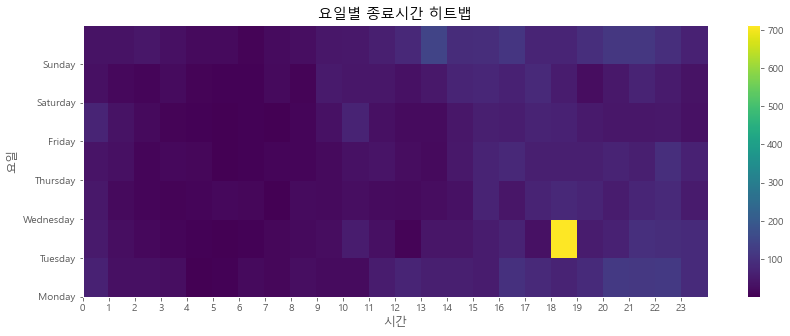

In [29]:
plt.figure(figsize = (14,5))
plt.pcolor(sparta_data_pivot_table)
plt.xticks(range(0,len(sparta_data_pivot_table.columns),1), sparta_data_pivot_table.columns)
plt.yticks(range(0,len(sparta_data_pivot_table.index),1), sparta_data_pivot_table.index)
plt.title('요일별 종료시간 히트뱁')
plt.xlabel('시간')
plt.ylabel('요일')
plt.colorbar()
plt.show()

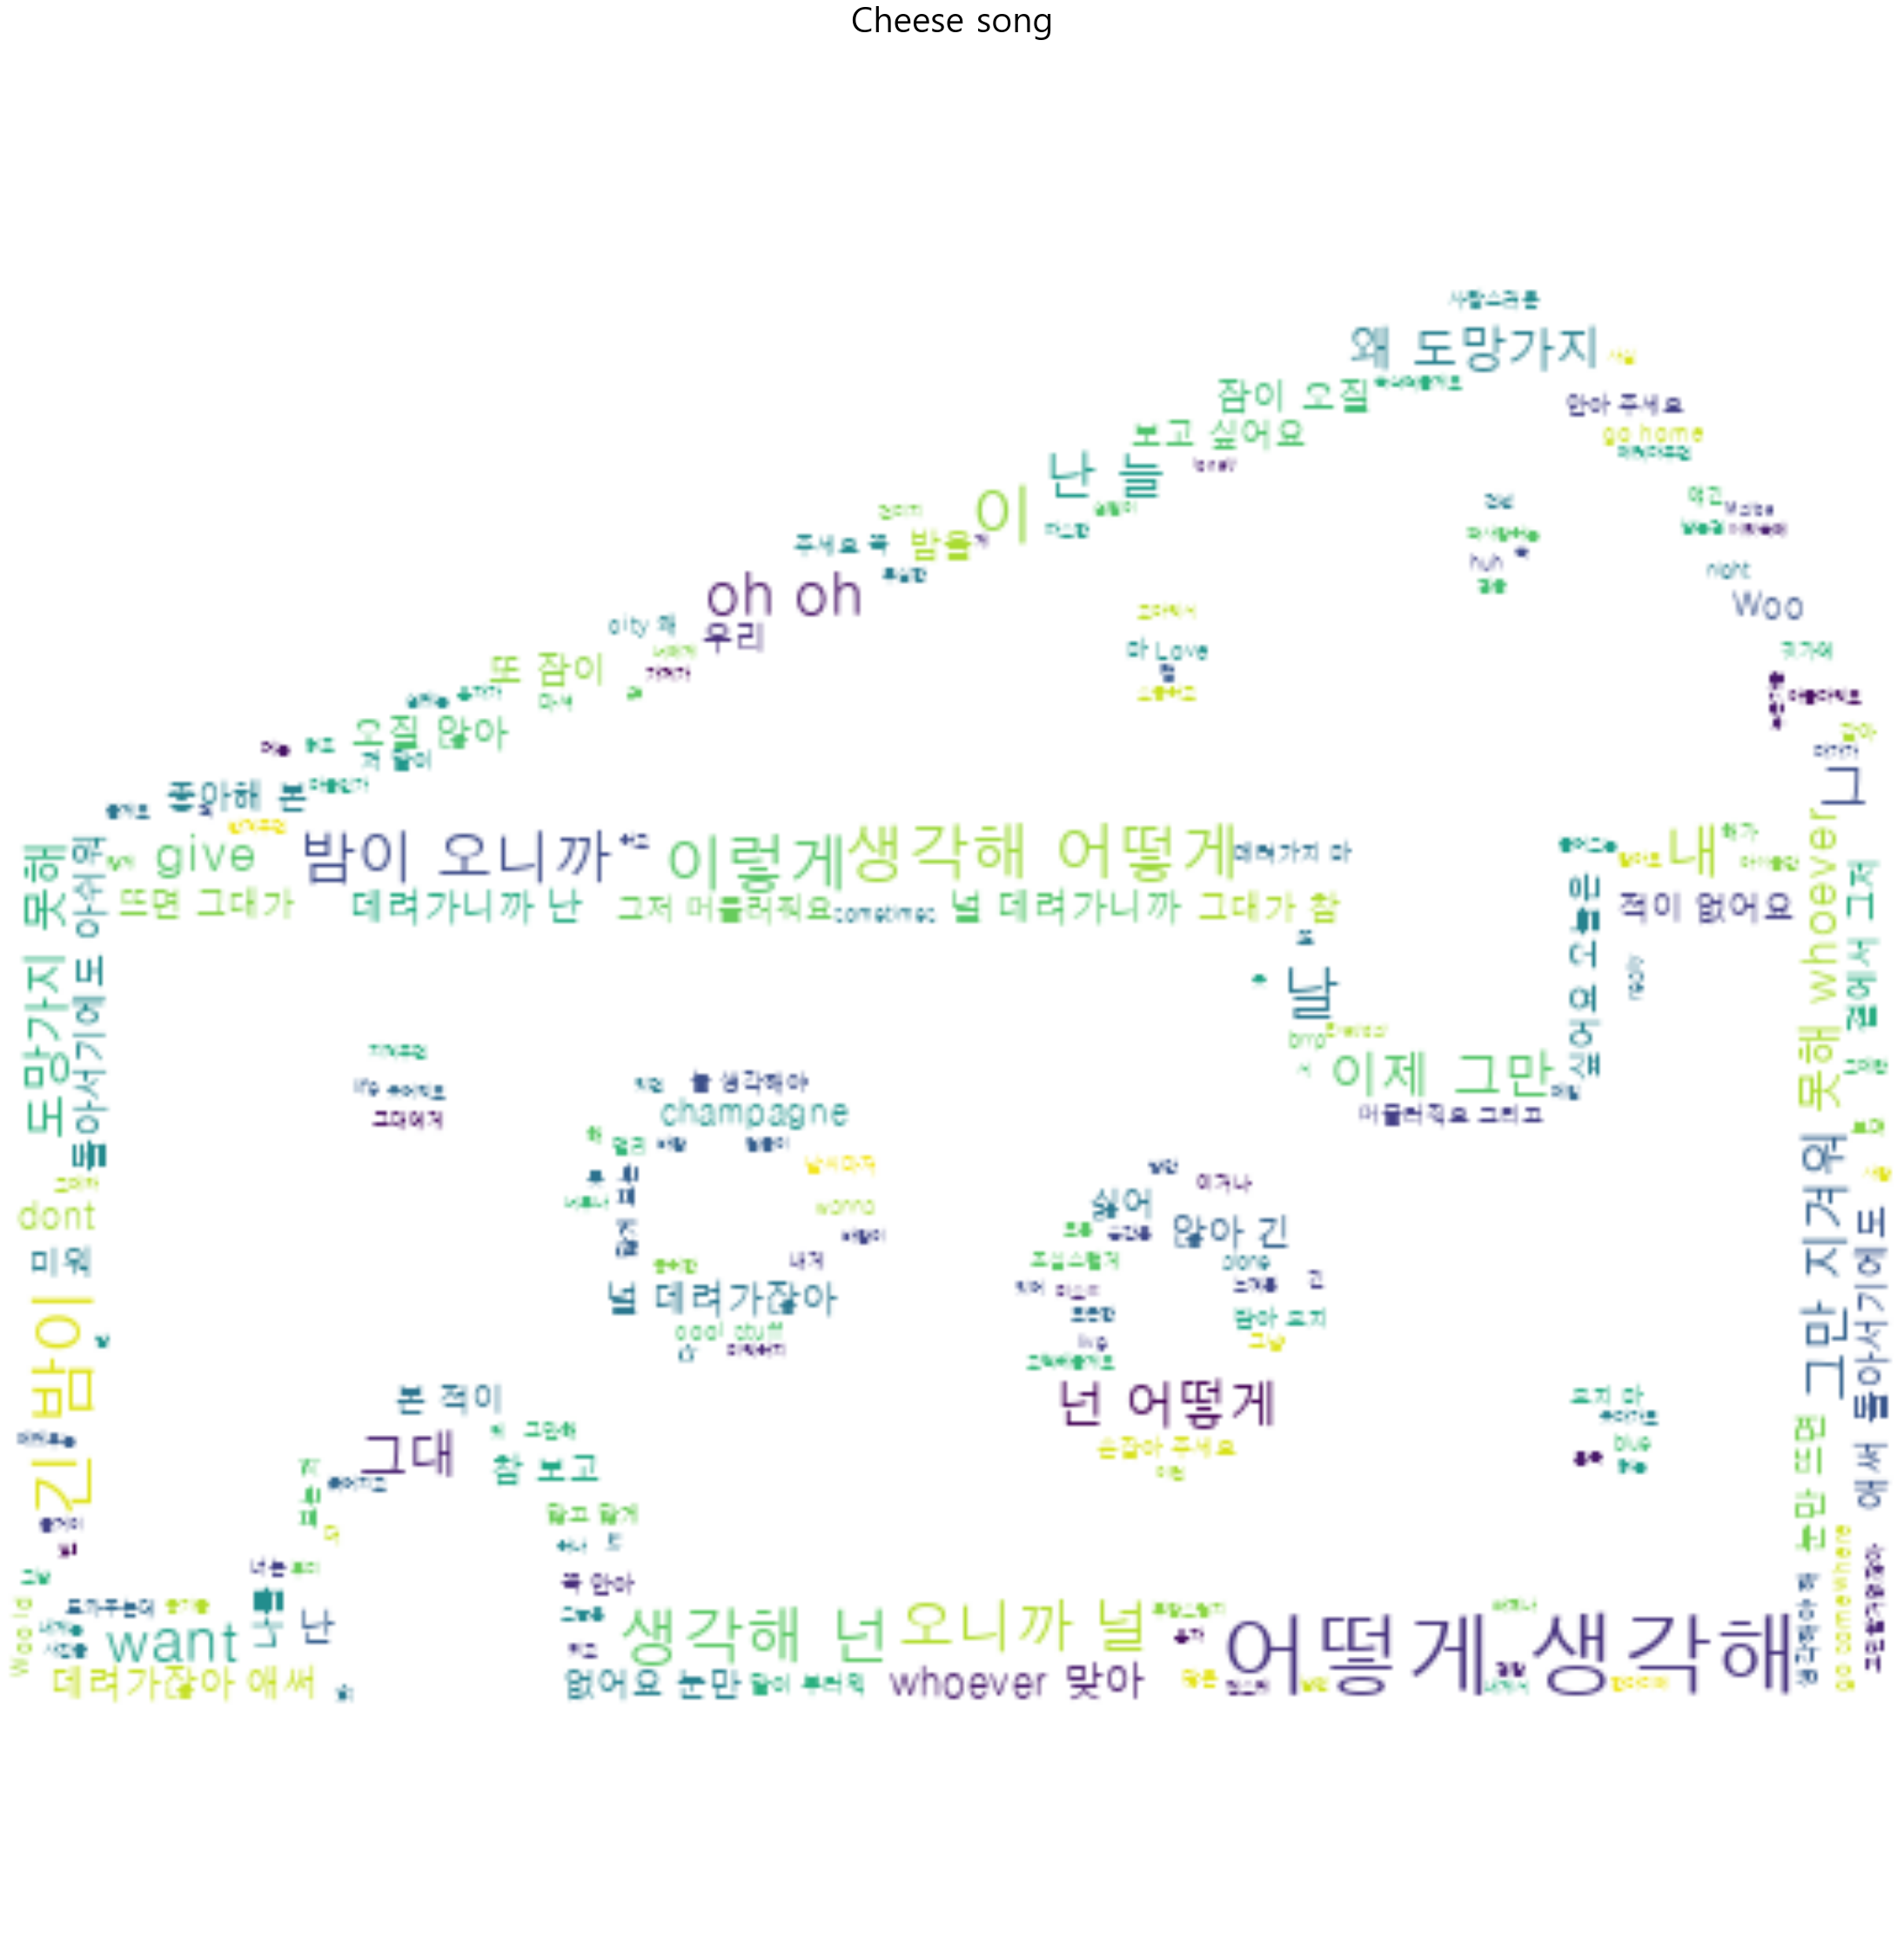

In [39]:
#워드 클라우드 
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = open('./data/song.txt', encoding='utf-8-sig')
text = text.read()
text = text.replace('\n'," ")
text

import re
pattern = '[^\w\s]'
result = re.sub(pattern= pattern, repl='', string = text)
result
font_path = 'C:\Windows\Fonts\H2GTRM.TTF'
mask = np.array(Image.open('./data/cheese.png'))
wc = WordCloud(font_path = font_path, background_color='white', mask= mask)
wc.generate(result)

f = plt.figure(figsize=(40,40))
plt.imshow(wc, interpolation='bilinear')
plt.title('Cheese song', size = 40)
plt.axis('off')
plt.show()
f.savefig('./data/mywordcloud.png')

In [68]:
sparta_data_mon_tue = sparta_data[(sparta_data['done_date_time_weekday'] == 'Tuesday') | (sparta_data['done_date_time_weekday'] == 'Monday') ]

In [52]:
sparta_data_mon_tue['done_date_time_weekday'].unique()

array(['Tuesday', 'Monday'], dtype=object)

In [53]:
sparta_data_mon_tue

,lecture_id,done_date,user_id,done_date_time,done_date_time_weekday,done_date_hour
0,5f266927e67b8fcf4340c087,2020-08-18 23:15:34.423000,4b7059a5ac55da515ec9bd77c7ceaaff,2020-08-18 23:15:34.423,Tuesday,23
1,5f266927e67b8fcf4340c087,2020-08-04 11:56:07.321000,3614f59da8a89ab0e92e9e5b44b3de9e,2020-08-04 11:56:07.321,Tuesday,11
2,5f266927e67b8fcf4340c087,2020-08-03 12:19:58.087000,93993d460a3ff841df8f138151736783,2020-08-03 12:19:58.087,Monday,12
4,5f266927e67b8fcf4340c087,2020-08-04 10:30:58.999000,b7d0953832ad73adf2fe1a1ab0e0d612,2020-08-04 10:30:58.999,Tuesday,10
6,5f266927e67b8fcf4340c087,2020-08-03 20:25:21.549000,10940f2ed04feabbf0d25b8650a99870,2020-08-03 20:25:21.549,Monday,20
...,...,...,...,...,...,...
8098,5f36558829f38171335a890a,2020-09-07 07:45:49.184000,cfc1a3aedf19eb4c4b09f97df13cab94,2020-09-07 07:45:49.184,Monday,7
8108,5f36558829f38171335a890a,2020-08-25 13:43:50.347000,39f728399fb26313a6a8b33b273ccdaa,2020-08-25 13:43:50.347,Tuesday,13
8109,5f36558829f38171335a890a,2020-08-24 12:58:12.312000,cd659aae9c9b2e297364a83ae08a20d4,2020-08-24 12:58:12.312,Monday,12
8110,5f36558829f38171335a890a,2020-09-07 17:05:09.447000,57305fe1c706c48abc30eab50b253fb4,2020-09-07 17:05:09.447,Monday,17


In [70]:
#pivot_table

sparta_data_mon_tue = pd.pivot_table(sparta_data_mon_tue, 
                                        values = 'user_id',
                                        aggfunc='count',
                                        index=['done_date_time_weekday'],
                                        columns = ['done_date_hour']
                                       ).agg(['Monday','Tuesday']) #agg는 index에서 값을 가져와야 하나다 

sparta_data_mon_tue

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Monday,67,31,30,27,3,5,19,14,28,22,...,62,56,100,84,68,86,119,117,118,86
Tuesday,51,27,17,12,6,3,6,14,20,26,...,41,56,68,34,713,56,66,97,92,86


In [59]:
#pivot_table
sparta_data_mon_tue =sparta_data_pivot_table.loc[['Monday','Tuesday'],:]
sparta_data_mon_tue

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Monday,67,31,30,27,3,5,19,14,28,22,...,62,56,100,84,68,86,119,117,118,86
Tuesday,51,27,17,12,6,3,6,14,20,26,...,41,56,68,34,713,56,66,97,92,86


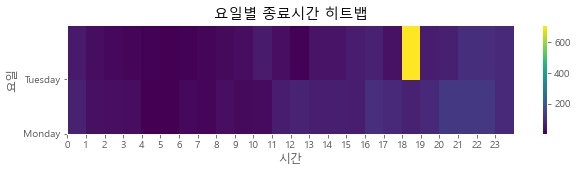

In [62]:
plt.figure(figsize = (10,2))
plt.pcolor(sparta_data_mon_tue)
plt.xticks(range(0,len(sparta_data_mon_tue.columns),1), sparta_data_mon_tue.columns)
plt.yticks(range(0,len(sparta_data_mon_tue.index),1), sparta_data_mon_tue.index)
plt.title('요일별 종료시간 히트뱁')
plt.xlabel('시간')
plt.ylabel('요일')
plt.colorbar()
plt.show()

([<matplotlib.axis.XTick at 0x1f981048400>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

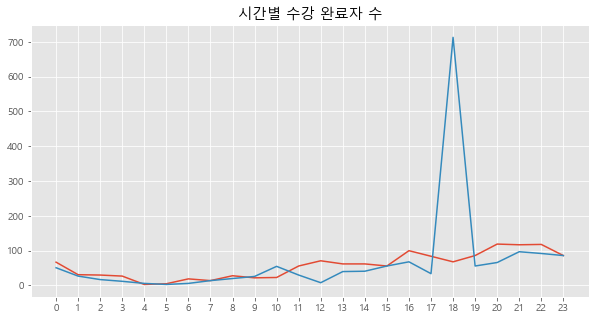

In [64]:
sparta_data_monday = sparta_data[sparta_data['done_date_time_weekday']== 'Monday']
sparta_data_monday = sparta_data_monday.groupby('done_date_hour').count()['user_id']

sparta_data_tuesday = sparta_data[sparta_data['done_date_time_weekday']== 'Tuesday']
sparta_data_tuesday = sparta_data_tuesday.groupby('done_date_hour').count()['user_id']

import matplotlib.pyplot as plt 

plt.figure(figsize=(10,5))
plt.plot(sparta_data_monday.index, sparta_data_monday)
plt.plot(sparta_data_tuesday.index, sparta_data_tuesday)
plt.title('시간별 수강 완료자 수')
plt.xticks(np.arange(24))

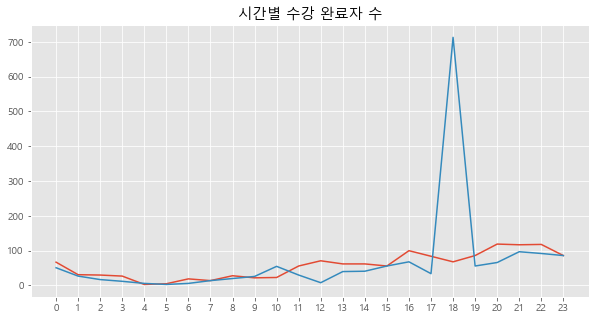

In [74]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,5))
plt.plot(sparta_data_mon_tue.T['Monday'].index, sparta_data_mon_tue.T['Monday'])
plt.plot(sparta_data_mon_tue.T['Tuesday'].index, sparta_data_mon_tue.T['Tuesday'])
plt.title('시간별 수강 완료자 수')
plt.xticks(np.arange(24))
plt.show()

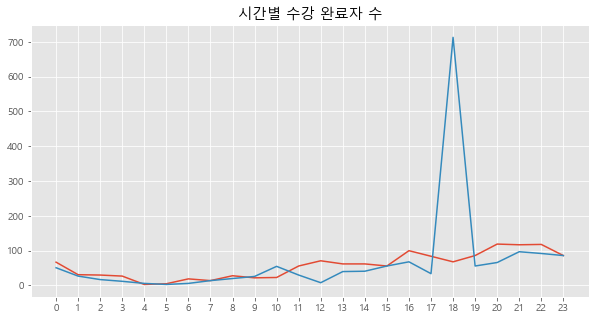

In [76]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,5))
plt.plot(sparta_data_mon_tue.loc['Monday'].index, sparta_data_mon_tue.loc['Monday'])
plt.plot(sparta_data_mon_tue.loc['Tuesday'].index, sparta_data_mon_tue.loc['Tuesday'])
plt.title('시간별 수강 완료자 수')
plt.xticks(np.arange(24))
plt.show()

0      67
1      31
2      30
3      27
4       3
5       5
6      19
7      14
8      28
9      22
10     23
11     56
12     71
13     62
14     62
15     56
16    100
17     84
18     68
19     86
20    119
21    117
22    118
23     86
Name: Monday, dtype: int64